This is a notebook to recreate Figure 1 of [Lamb, Taylor & van Haasteren 2023](https://arxiv.org/abs/2303.15442).  This notebook profiles the a simulated data set as a function of the number of pulsars.

In [1]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format ='retina'

import numpy as np
import matplotlib.pyplot as plt
import glob
from chainconsumer import ChainConsumer
import pickle
from ceffyl import Ceffyl, models
from enterprise.signals import parameter, gp_priors as gpp
from enterprise_extensions.model_utils import get_tspan

# ACCRE-specific import to load correct latex file
## COMMENT OUT AS REQUIRED
import os
os.environ["PATH"] += os.pathsep + '/home/lambwg/latex/bin/x86_64-linux' 

In [4]:
# setup default plotting code
plt.rcParams.update(plt.rcParamsDefault)
with open('/home/lambwg/ng15_rcparams.json', 'rb') as fin:
    plt.rcParams.update(json.load(fin))

# Profiling code

This code was not run in a notebook, but in its own specific script. [Find the script here! - profiler.py
](./scripts/profiler.py)

# Producing the plot

load all the timings!

In [5]:
m2a_avg = np.load('./profiles/m2a')
m3a_avg = np.load('./profiles/m3a')
gl_avg = np.load('./profiles/gl')
gfl_avg = np.load('./profiles/gfl')
fs_avg = np.load('./profiles/fs')

plot the figure!

In [59]:
psrs = np.arange(1, 46)

plt.figure()
plt.plot(psrs, [fs_avg[-1]]*45, label='free spectrum refit',
         ls='--')
plt.plot(psrs, gl_avg, label='GFL Lite')
plt.plot(psrs, gfl_avg, label='GFL')
plt.plot(psrs, m2a_avg, label='uncorrelated powerlaw')
plt.plot(psrs, m3a_avg, label='HD-correlated powerlaw')

plt.plot(psrs, 0.00025*psrs,
         c='grey', ls=':', alpha=0.75)
plt.plot(psrs, 1.5e-04*psrs**2,
         c='grey', ls=':', alpha=0.75)
plt.annotate('$y\propto N_\mathrm{p}$', xy=(10, 0.001),
             c='grey', fontsize=18, alpha=0.75)
plt.annotate('$y\propto N_\mathrm{p}^2$', xy=(30, 0.04),
             c='grey', fontsize=18, alpha=0.75)

plt.xlabel('Number of pulsars')
plt.ylabel('likelihood evaluation time (s)')
plt.yscale('log')
plt.grid(visible=True)
#plt.legend(markerfirst=False, frameon=True)

plt.savefig('../plots/profile.pdf',
            dpi=400, bbox_inches='tight', rasterized=True);

/tmp/ipykernel_224299/2678739950.py:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../plots/profile.pdf',


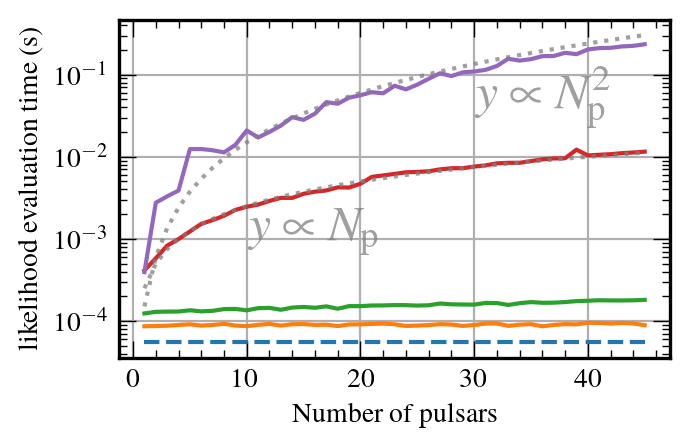

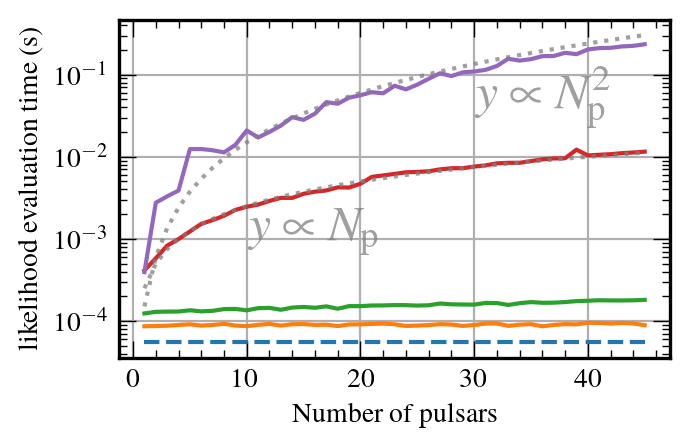

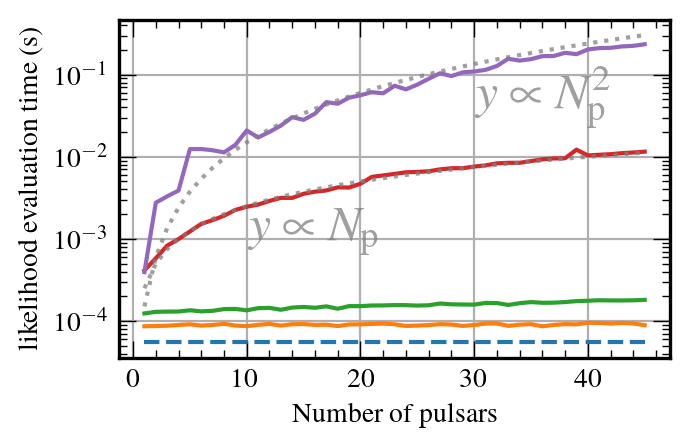

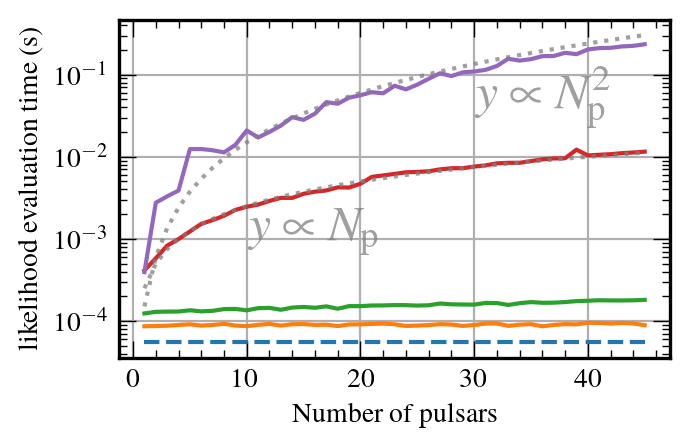

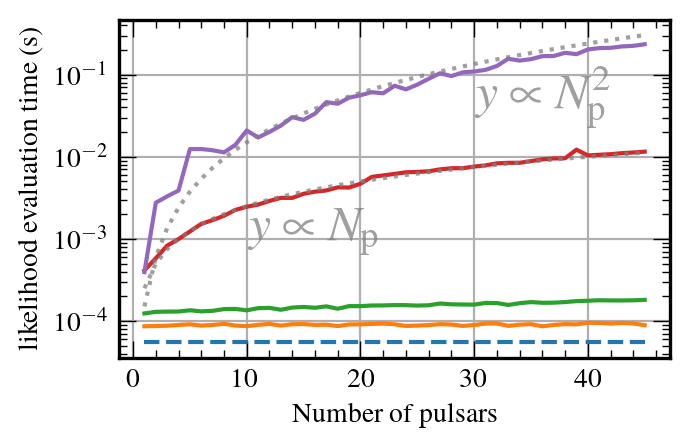

In [61]:
plt.show();